In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

webiste used to create [maps](https://www.mapchart.net/usa.html)

In [2]:
df = pd.read_csv('telecom_data.zip')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.drop(columns = ['phone number'], axis = 1, inplace = True)

## Dataset Metadata

- state: The state of the customer.
- account length: The length of the account in days.
- area code: The area code of the customer's phone number.
- phone number: The phone number of the customer.
- international plan: Whether the customer has an international plan or not.
- voice mail plan: Whether the customer has a voicemail plan or not.
- number vmail messages: The number of voicemail messages the customer has.
- total day minutes: Total minutes of day calls.
- total day calls: Total number of day calls.
- total day charge: Total charge for the day calls.
- total eve minutes: Total minutes of evening calls.
- total eve calls: Total number of evening calls.
- total eve charge: Total charge for the evening calls.
- total night minutes: Total minutes of night calls.
- total night calls: Total number of night calls.
- total night charge: Total charge for the night calls.
- total intl minutes: Total minutes of international calls.
- total intl calls: Total number of international calls.
- total intl charge: Total charge for the international calls.
- customer service calls: Number of times the customer called customer service.
- churn: Whether the customer churned or not (True/False).
    - churn : customer has canceled their business with the company

In [5]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Let's take a quick glance at how many customers are churning 

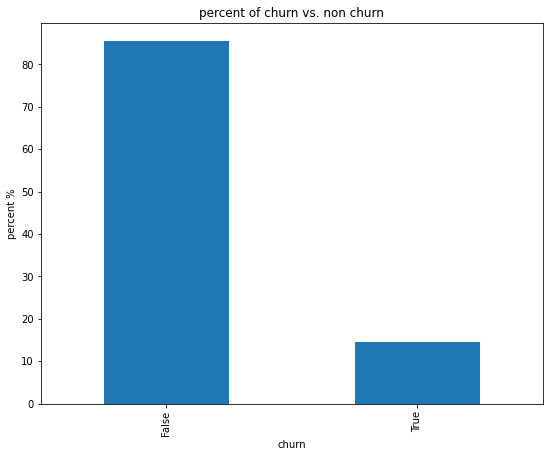

In [6]:
fig, ax = plt.subplots(figsize = (9,7))
churn_bar = df['churn'].value_counts(normalize=True) * 100
churn_bar.plot(kind='bar')
ax.set_ylabel('percent %')
ax.set_title('percent of churn vs. non churn')
plt.show();

In [7]:
round(len(df[df['churn'] == False]) / len(df) * 100, 2)

85.51

Above we can see that approximately 85.5 % of customers dont churn, meaning only about 14.48 % do. While this is a decently low rate, we can attempt to reduce this as little as possible to maximize revenue and customer retention.

Let's look into the data we have and determine which ones are categorical and which ones are continuous.
Categorical data is any data pretaining to a category, e.g. true/false. Categorical is always one thing or another.
Whereas continuous data is data that can be infinate in scope e.g. 1.5, 16.3333333 and so on. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

- categorical data:
    - state
    - area code
    - international plan
    - voicemail plan
- continuous data:
    - everything else

## State categorical

Let's take a look into the state categorical data so see how many people churned related to this data.

<Axes: xlabel='state', ylabel='count'>

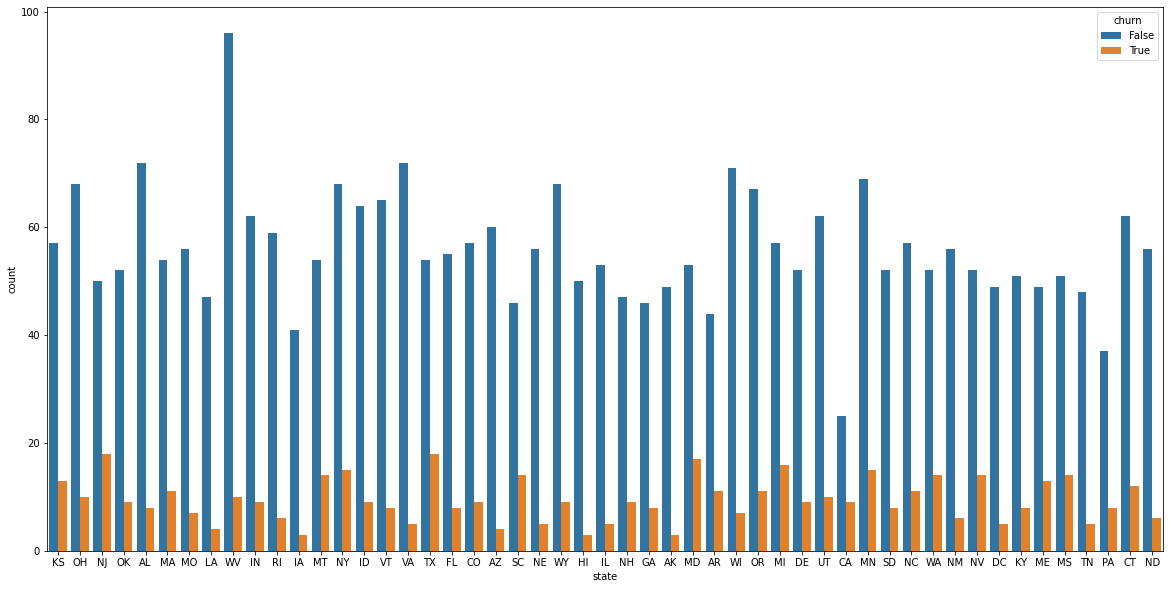

In [9]:
plt.figure(figsize = (20,10))
sns.countplot(data = df, x = 'state', hue = 'churn')

Here we see all the states with their corresponding churn counts. This graph may be a little to much to grasp all at once, so lets look into the top 10 states with the most churn and the top 10 with the least.

In [10]:
df_churn = df[df['churn'] == True].copy()
df_churn.drop(columns = ['international plan', 'voice mail plan'], axis = 1, inplace = True)
churn_top_10 = df_churn.sort_values(by = 'churn').groupby('state').sum()
churn_top_10.sort_values('churn', ascending = False)[:10]

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,
NJ,1708,8093,159,4166.7,1834,708.33,3799.8,1881,323.00,3847.4,1795,173.14,194.3,78,52.49,39,18
TX,1881,8019,57,3895.9,1771,662.31,3859.3,1763,328.06,3879.5,1790,174.58,198.2,85,53.53,30,18
MD,1911,7386,83,3913.4,1664,665.30,3656.2,1716,310.78,3333.4,1484,149.99,193.8,61,52.32,38,17
MI,1908,6686,54,3162.6,1696,537.66,3332.8,1649,283.28,3085.9,1639,138.89,188.0,72,50.76,39,16
MN,1587,6883,82,3124.1,1501,531.12,3210.1,1564,272.87,3002.5,1421,135.12,169.6,49,45.79,41,15
NY,1833,6292,33,2960.7,1413,503.31,2858.5,1448,242.97,2874.1,1566,129.34,171.9,68,46.42,40,15
MT,1474,5965,117,2504.7,1241,425.81,2905.7,1387,246.98,2766.0,1479,124.45,152.5,61,41.20,36,14
NV,1277,6081,90,3016.1,1440,512.75,2998.9,1307,254.90,2799.5,1425,125.97,134.1,47,36.19,30,14
MS,1249,5965,84,2753.3,1573,468.06,2816.0,1453,239.37,3108.0,1446,139.86,142.9,65,38.60,32,14


Below we see a map with the top 10 states with the most churns. A majority of these states are located in the east / south east, with only 2 states within the general west region.

<div>
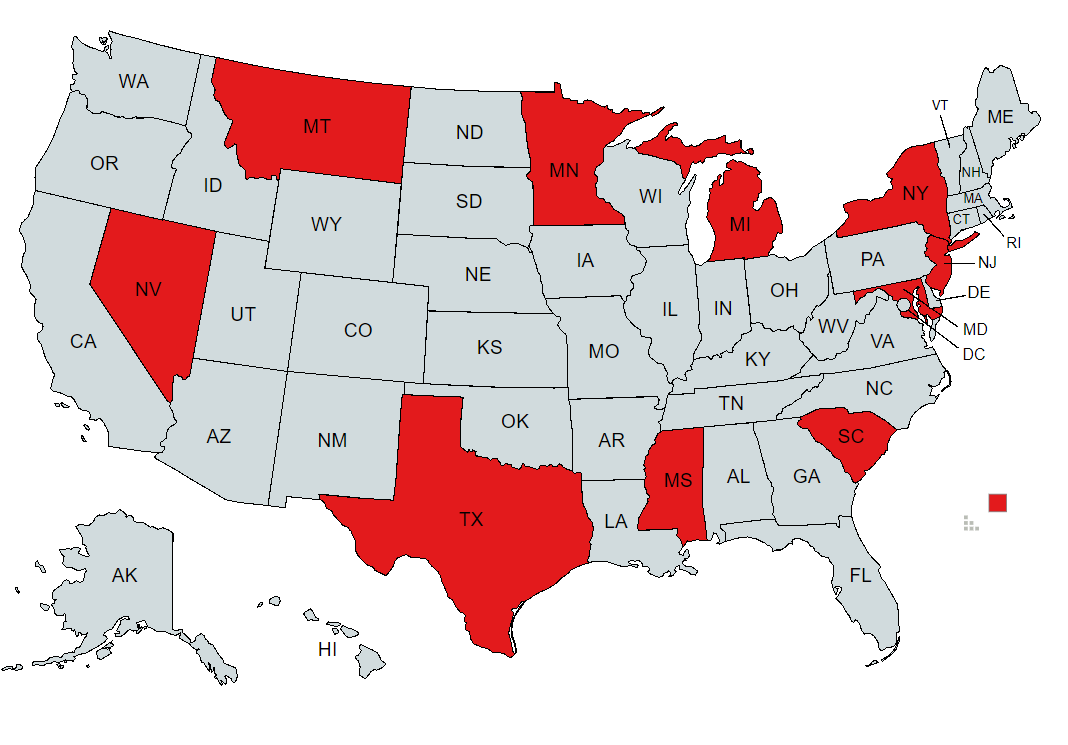
</div>

In [11]:
df_low_churn = df[df['churn'] == True].copy()
churn_top_10_low = df_churn.sort_values(by = 'churn').groupby('state').sum()
churn_top_10_low.sort_values('churn', ascending = True)[:10]

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,
AK,414,1245,0,479.7,270,81.55,494.1,299,42.00,487.5,282,21.95,31.1,6,8.39,10,3
IA,165,1435,0,739.7,395,125.75,507.9,319,43.17,723.5,277,32.56,25.8,12,6.97,9,3
HI,312,1238,0,708.6,330,120.46,731.0,292,62.13,641.0,314,28.84,31.5,15,8.51,9,3
AZ,300,1843,0,800.7,436,136.12,829.0,438,70.46,908.1,409,40.87,40.2,18,10.86,9,4
LA,538,1755,27,650.2,417,110.53,852.2,388,72.44,768.7,385,34.59,41.2,12,11.12,9,4
NE,518,2068,0,1159.3,494,197.09,1115.7,579,94.83,1170.5,550,52.68,58.4,19,15.77,6,5
VA,417,2156,42,914.9,578,155.54,1235.2,503,105.00,1214.7,453,54.66,58.9,25,15.91,8,5
TN,437,2258,65,1044.1,511,177.51,949.4,447,80.70,1044.1,439,46.98,57.0,14,15.39,15,5
DC,346,2061,0,943.0,539,160.31,911.9,449,77.53,1224.5,464,55.11,53.4,21,14.42,9,5


Now we have a map including the states with the lowest churns (in green) with a mojority of states residing withing the central america area.

<div>
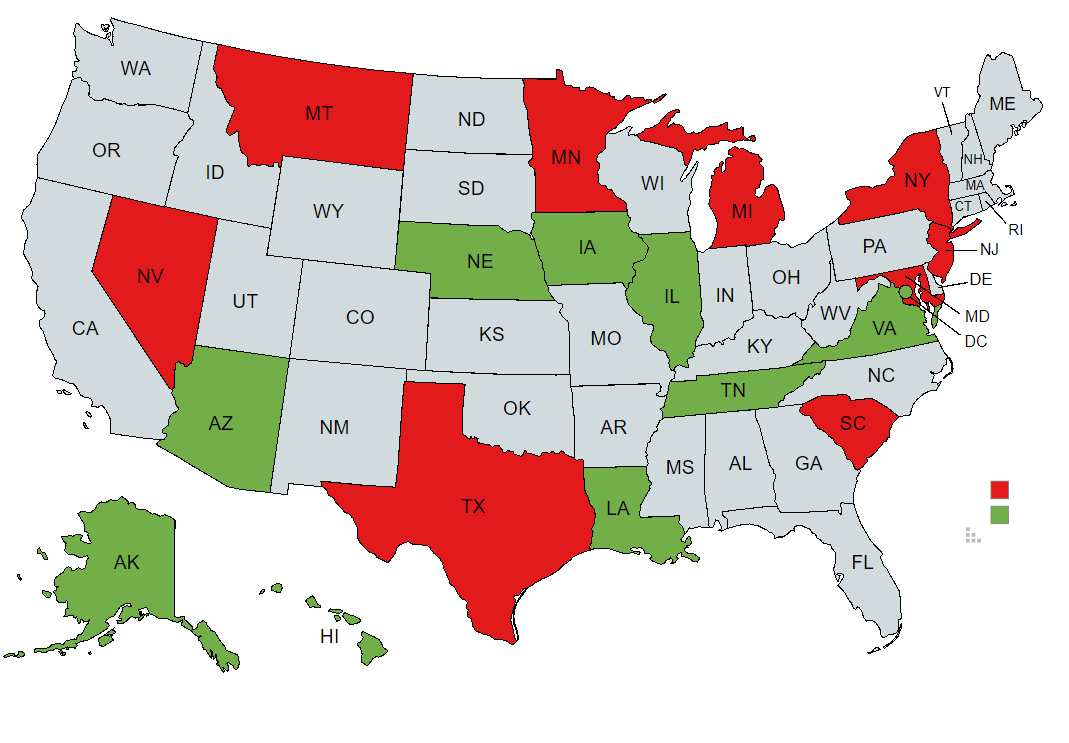
</div>

## Area code categorical

When it comes to area code, we come accross an interesting situation. As shown below, this data sheet has three area codes, with all of them being located within california. This implies this specific company primarily conducts its business in california, while a failry large amount of customers have moved to another state. This could lead to an interesting conclusion, as its possbile that moving to another state could cause a customer to churn, as there could be cheaper / more reliable service options within the new living area. California (residing in grey coloring) has a 'middle of the pack' churn rate.

- 415 - San Fransisco
- 510 - Oakland
- 408 - San Jose

In [12]:
df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

Let's check out churn rate per these three area codes.

<Axes: xlabel='area code', ylabel='count'>

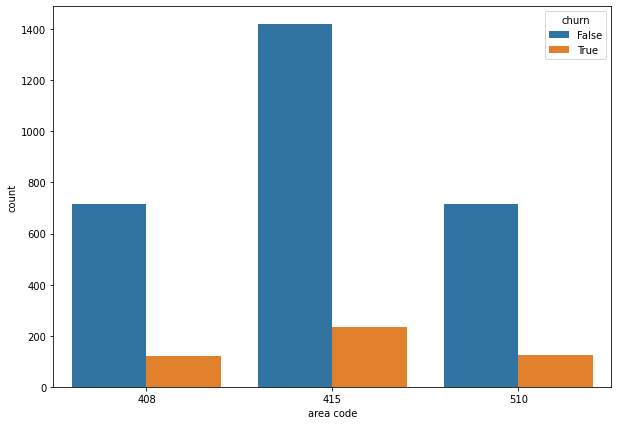

In [19]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'area code', hue = 'churn')

as we can see, 415 (San Fransisco) has the highest total amount of customers, with 1655 in total. An interesting thing to note is that even though 415 has significantly more customers than the other 2, the churn rate is about 15% for all of them.

In [42]:
def area_percent(df, area_code):
    area = df[df['area code'] == area_code]
    count = len(area)
    area_churn = area[area['churn'] == True]
    c_count = len(area_churn)
    percent = round((c_count / count) * 100, 2)
    return 'out of {} cutomers in the {} area, {} ({}%) have churned'.format(count, area_code, c_count, percent)

In [43]:
area_percent(df, 415)

'out of 1655 cutomers in the 415 area, 236 (14.26%) have churned'

In [44]:
area_percent(df, 510)

'out of 840 cutomers in the 510 area, 125 (14.88%) have churned'

In [45]:
area_percent(df,408)

'out of 838 cutomers in the 408 area, 122 (14.56%) have churned'